### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV files
reviews = pd.read_csv('turtle_reviews.csv')
sales = pd.read_csv('turtle_sales.csv')

# View the DataFrame.
reviews

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [3]:
# Check for missing values.
reviews_na = reviews[reviews.isna().any(axis=1)]

print(reviews_na.shape[0],"Rows with Missing Data")
reviews_na

0 Rows with Missing Data


Empty DataFrame
Columns: [gender, age, remuneration (k£), spending_score (1-100), loyalty_points, education, language, platform, product, review, summary]
Index: []

In [4]:
# Explore the data.
reviews.info()
reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [5]:
# Check Headers
print("Headers: ","\n", reviews.columns,"\n")

Headers:  
 Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object') 



> The client is interested in :
>- the possible relationships between the __age, remuneration, spending scores, and loyalty points__
>- the impact that each __product__ has on sales
>- marketing based on social data (e.g. customer __reviews__ _& summary_) and groups within the customer base _(__gender, education level__)_
>> keep only these columns <br>

> Based on the Turtle Games Metadata, the language and platform data are inconsequential as they are uniform
>> "All the reviews were in English." : EN <br>"All the reviews were obtained from the website of Turtle Games." : Web <br>

> __remove < 'language', 'platform' >__ columns

In [6]:
# Drop unnecessary columns.
reviews_clean = reviews.copy().drop(columns=['language', 'platform'])

# View column names.
print("Headers: ","\n", reviews_clean.columns,"\n")

Headers:  
 Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object') 



## 3. Rename columns

In [7]:
# Rename the column headers.
# in order to make data retrieval more intuitive
reviews_clean = reviews_clean.rename(columns=\
                                     {'remuneration (k£)': 'remuneration',\
                                     'spending_score (1-100)':'spending_score'})

# View column names.
print("Headers: ","\n", reviews_clean.columns)

Headers:  
 Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


In [8]:
reviews_clean

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews_clean.to_csv(r'turtle_reviews_clean.csv', index=False)


In [10]:
# Import new CSV file with Pandas.
csv_reviews_clean = pd.read_csv('turtle_reviews_clean.csv')


# View DataFrame.
csv_reviews_clean

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [11]:
# Explore the data.
reviews_clean.info()
reviews_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


age  remuneration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000

## 5. Linear regression

> Since we are interested mainly in predicting the __loyalty points__, this is our _dependent_ variable

> We can create a function to generate the scatter and fit the OLS model

In [12]:
# Create function for OLS model and to visualise scatter
def simpleLR_OLS(x,y):
    # Check for linearity with Matplotlib - visualise scatter
    plt.scatter(x, y)

    # Create formula and pass through OLS methods.
    f = 'y ~ x'
    test = ols(f, data = reviews_clean).fit()

    # Print the regression table.
    print(test.summary() )
    
    return test

Useful values to be printed in a separate function to keep the jupyter notebook manageable and easier to trace/refer only to specific data

In [13]:
# Create function to print useful values

def simpleLR_OLS_useful(test):
    # Extract the estimated parameters.
    print("Parameters: \n", test.params, "\n")  

    # Extract the standard errors.
    print("Standard errors: \n", test.bse, "\n")  

    # Extract the predicted values.
    print("Predicted values: \n", test.predict(), "\n")  

In [14]:
# Create function to plot the graph with a regression line.

def simpleLR_plot(x,y,y_pred):
    # Plot the data points with a scatterplot.
    plt.scatter(x, y)

    # Plot the regression line (in black).
    plt.plot(x, y_pred, color='black')

    # Set the x and y limits on the axes.
    plt.xlim(0)
    plt.ylim(0)

    # View the plot.
    plt.show()

## 5a) spending vs loyalty

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        11:44:57   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.1

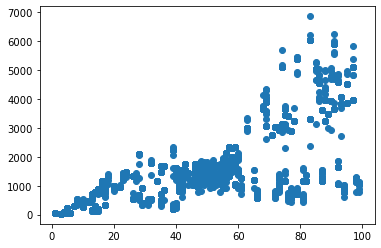

In [15]:
# Independent variable = spending_score
SS_LP_X = reviews_clean['spending_score'] 

# Dependent variable = loyalty_points
SS_LP_Y = reviews_clean['loyalty_points'] 

SS_LP_test = simpleLR_OLS(SS_LP_X,SS_LP_Y)

In [16]:
# Extract the useful values
simpleLR_OLS_useful(SS_LP_test)


Parameters: 
 Intercept   -75.052663
x            33.061693
dtype: float64 

Standard errors: 
 Intercept    45.930554
x             0.814419
dtype: float64 

Predicted values: 
 [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314] 



In [17]:
# Generate the linear regression model.
# Set the the X coefficient and the constant to generate the regression table.
SS_LP_Y_pred = (-75.052663) + 33.061693 * SS_LP_X

# View the output
SS_LP_Y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

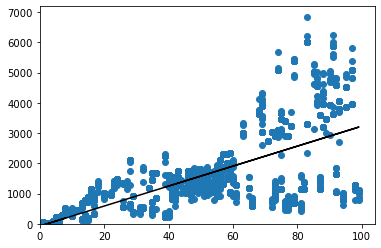

In [18]:
# Plot the graph with a regression line.
simpleLR_plot(SS_LP_X, SS_LP_Y, SS_LP_Y_pred)

### Useful values: 
__R-squared__ = 0.452 <br>
__Adjusted R-squared__ = 0.452 <br>
> low R-squared value

__p-value__ = 2.92e-263 <br>

__coefficient__ = 33.0617 (positive) <br>
> Generally positive relationship between spending and loyalty points

__(P>|t|)__ = 0.000  <br>
> (significant slope)

__95% confidence interval__ = [31.464 34.659] <br>

## 5b) remuneration vs loyalty

> Remuneration refers to the customer's annual income (in pounds)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        11:44:57   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.2

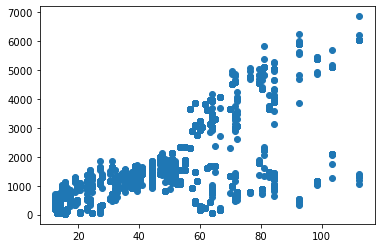

In [19]:
# Independent variable = remuneration
R_LP_X = reviews_clean['remuneration'] 

# Dependent variable = loyalty_points
R_LP_Y = reviews_clean['loyalty_points'] 

R_LP_test = simpleLR_OLS(R_LP_X,R_LP_Y)

In [20]:
# Extract the useful values
simpleLR_OLS_useful(R_LP_test)


Parameters: 
 Intercept   -65.686513
x            34.187825
dtype: float64 

Standard errors: 
 Intercept    52.170717
x             0.977925
dtype: float64 

Predicted values: 
 [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671] 



In [21]:
# Generate the linear regression model.
# Set the the X coefficient and the constant to generate the regression table.
R_LP_Y_pred = (-65.686513) + 34.187825 * R_LP_X

# View the output
R_LP_Y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

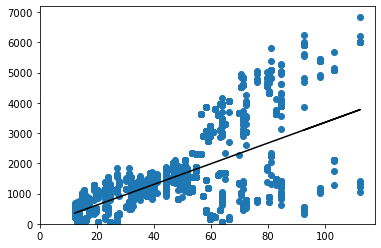

In [22]:
# Plot the graph with a regression line.
simpleLR_plot(R_LP_X, R_LP_Y, R_LP_Y_pred)

### Useful values: 
__R-squared__ = 0.380 <br>
__Adjusted R-squared__ = 0.379 <br>
> low R-squared value

__p-value__ = 2.43e-209 <br>

__coefficient__ = 34.1878 (positive) <br>
> Generally positive relationship between remuneration and loyalty points

__(P>|t|)__ = 0.000  <br>
> (significant slope)

__95% confidence interval__ = [32.270      36.106] <br>

### Other observations
 
 #### 1. Hypothesis: 2 distinct trends for remuneration vs loyalty points
 > There appears to be 2 distinct trends within the scatter plot
 > 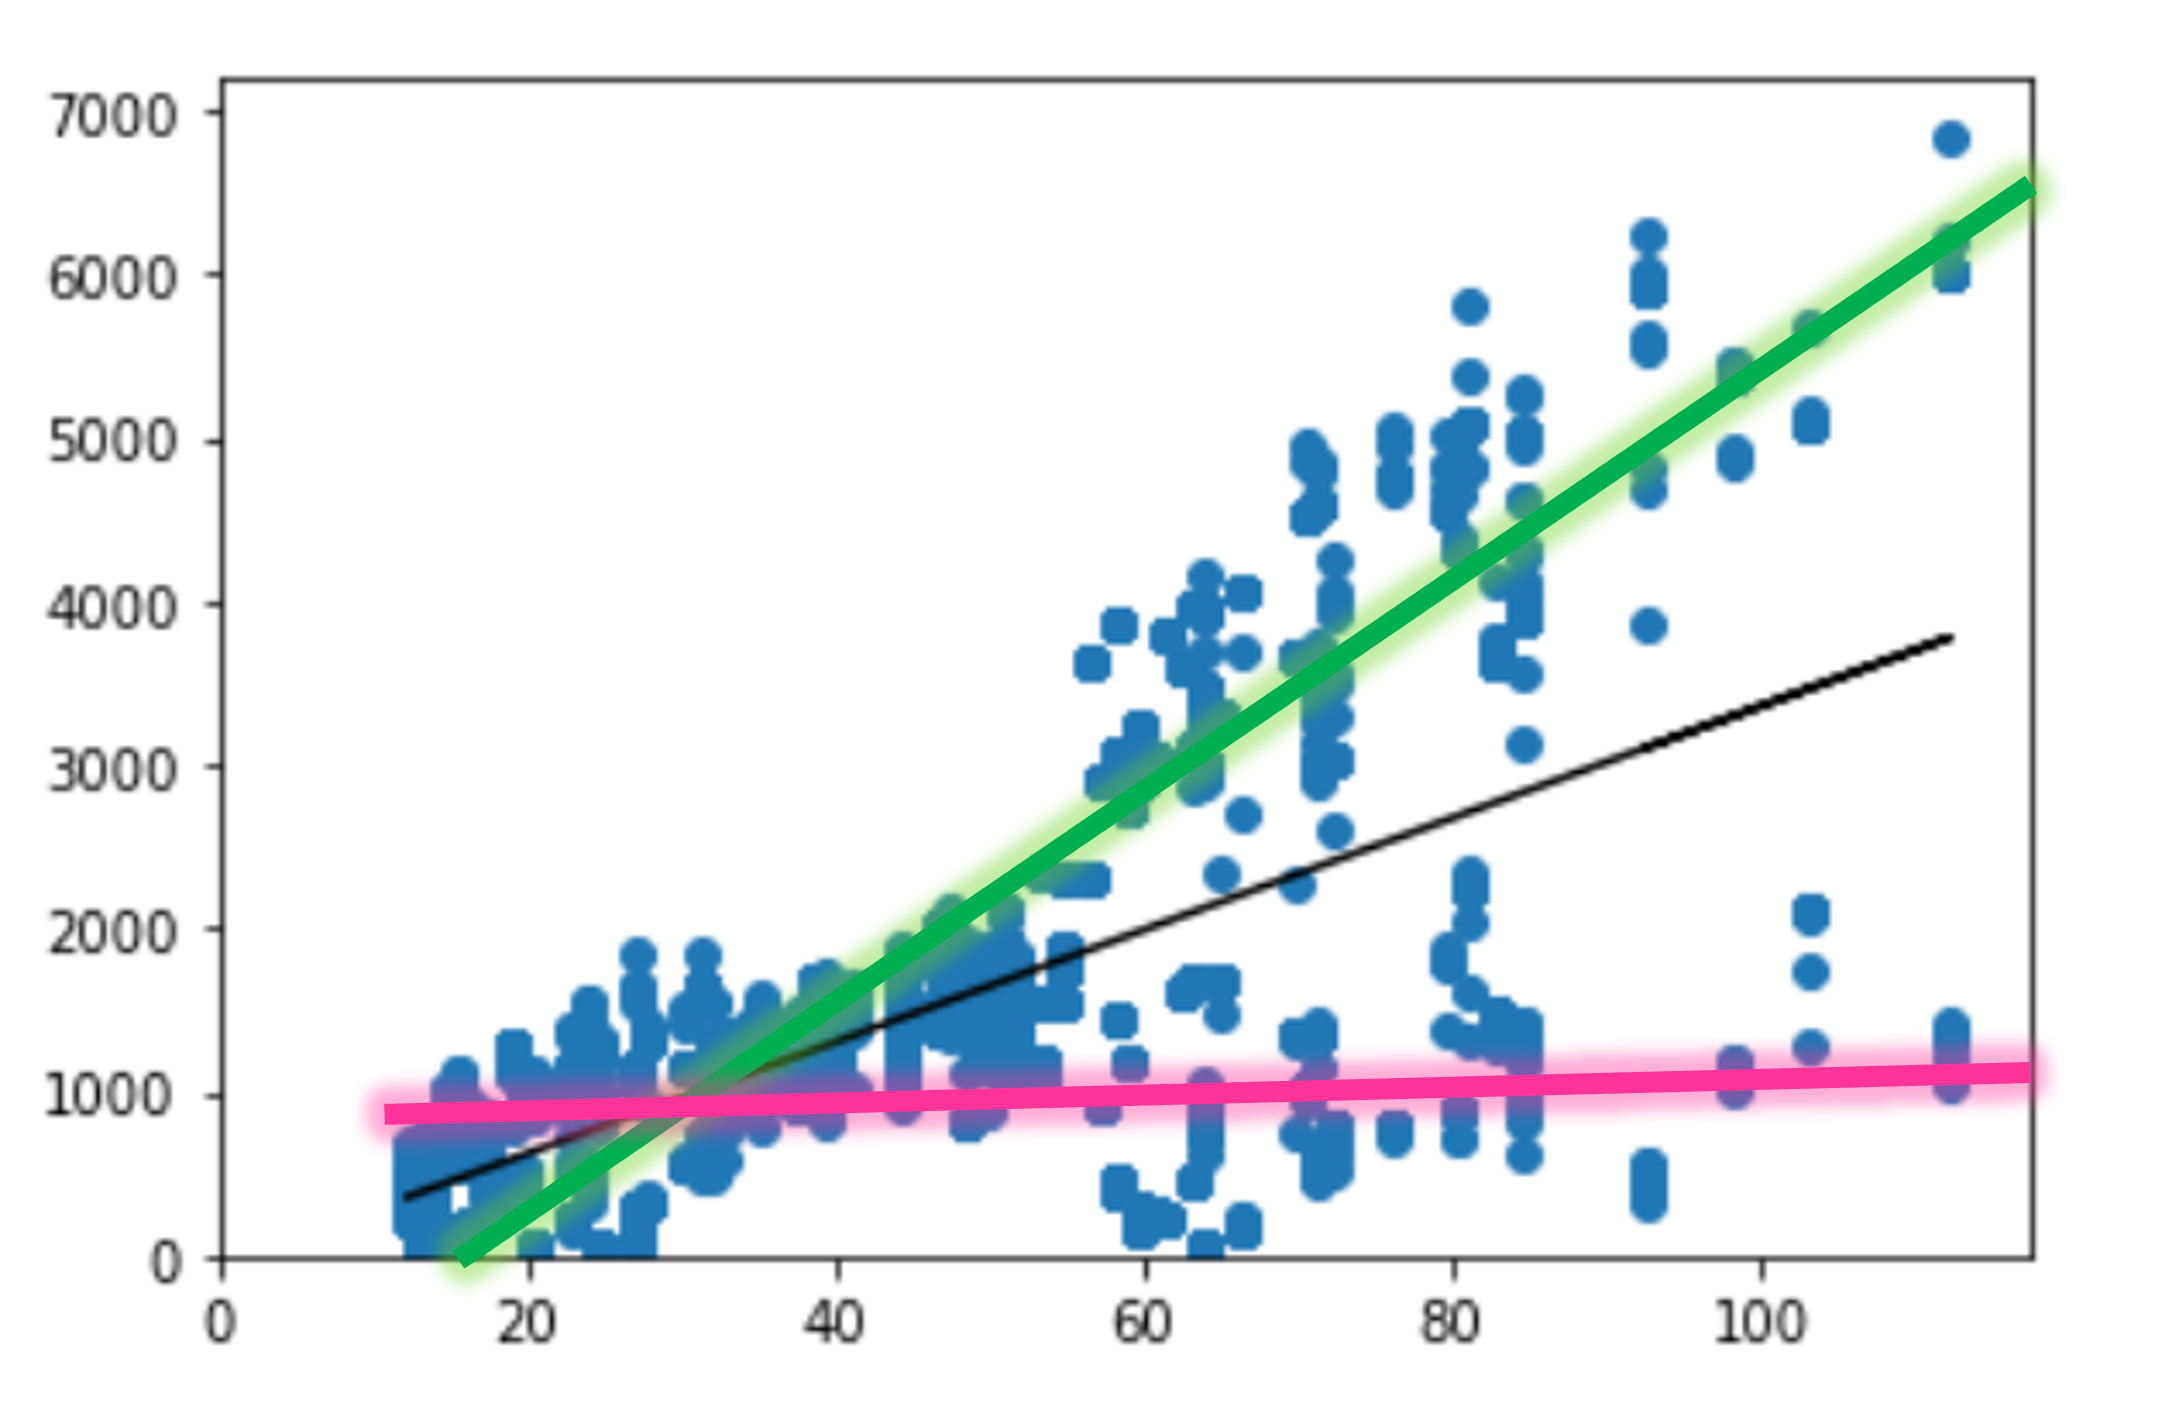
 > There might be a second dependant variable that further divides the customer base into 2 groups, for 1 of which the loyalty points is more closely related to the remuneration amount

### 5c) age vs loyalty

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 18 Dec 2022   Prob (F-statistic):             0.0577
Time:                        11:44:57   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.0

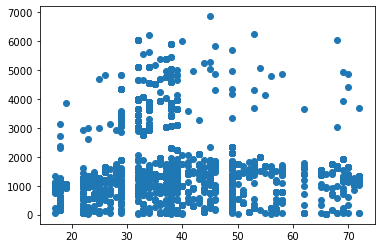

In [23]:
# Independent variable = age
A_LP_X = reviews_clean['age'] 

# Dependent variable = loyalty_points
A_LP_Y = reviews_clean['loyalty_points'] 

A_LP_test = simpleLR_OLS(A_LP_X,A_LP_Y)

In [24]:
# Extract the useful values
simpleLR_OLS_useful(A_LP_test)


Parameters: 
 Intercept    1736.517739
x              -4.012805
dtype: float64 

Standard errors: 
 Intercept    88.248731
x             2.113177
dtype: float64 

Predicted values: 
 [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ] 



In [25]:
# Generate the linear regression model.
# Set the the X coefficient and the constant to generate the regression table.
A_LP_Y_pred = (1736.517739) + -4.012805 * A_LP_X

# View the output
A_LP_Y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

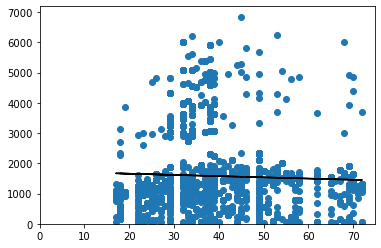

In [26]:
# Plot the graph with a regression line.
simpleLR_plot(A_LP_X, A_LP_Y, A_LP_Y_pred)

### Useful values: 
__R-squared__ = 0.002 <br>
__Adjusted R-squared__ = 0.001 <br>
> negligible R-squared value <br>
> __Model CANNOT be used to predict loyalty points based on customer's age__

__p-value__ = 0.0577 <br>

__coefficient__ = -4.0128 (negative) <br>
> Generally negative relationship between age and loyalty points <br>
> However, the __relationship is insignificant__

__(P>|t|)__ = 0.058  <br>
> (insignificant slope)

__95% confidence interval__ = [-8.157       0.131] <br>

## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of remuneration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `remuneration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [27]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Load the CSV file(s) as R_SS
# containing only 'remuneration' and 'spending_score' columns
R_SS = reviews_clean[['remuneration','spending_score']].copy()

# View DataFrame.
R_SS

remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]

In [29]:
# Explore the data.
R_SS.info()
R_SS.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

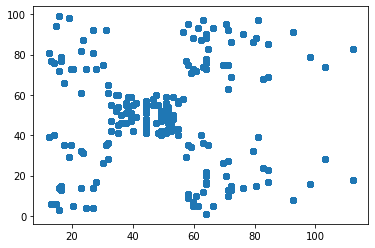

In [30]:
# Create a scatterplot with Seaborn.
plt.scatter(R_SS['remuneration'], R_SS['spending_score'])

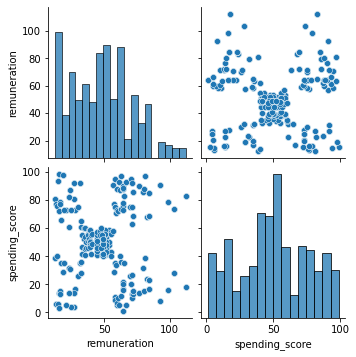

In [31]:
# Create a pairplot with Seaborn.
sns.pairplot(R_SS)

## 3. Elbow and silhoutte methods

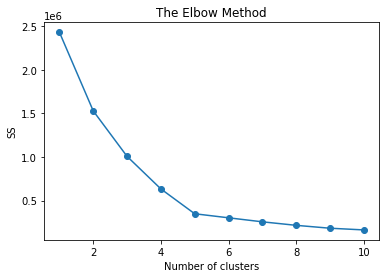

In [32]:
# Determine the number of clusters: Elbow method.

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(R_SS)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

### Elbow = point where WSS starts to diminish

After 5 clusters, the changes in SS are less significant.
> 5 is the ideal number of clusters by Elbow Method

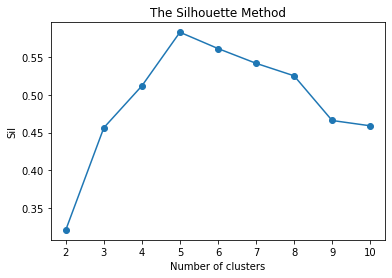

In [33]:
# Determine the number of clusters: Silhouette method.

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(R_SS)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(R_SS,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

### maximum silhouette coefficient = peak in the plot

After 5 clusters, the silhouette coefficient starts to decrease.
> 5 is the ideal number of clusters by Silhouette Method

### => Ideal number of clusters found by both methods = **5**

## 4. Evaluate k-means model at different values of *k*

> Since the __*k*-value of 5__ is evident by usage of all 3 possible methods
> - visually (human judgement)
> - elbow method
> - silhouette method

> I believe that it is not useful to model the k-means clustering with different values of *k*

> However,  I will still plot _k_ = 6,7 for demonstration, since
> - there might be another clusters missed by my human judgement
> - they are the next best fit based on the silhouette method

In [34]:
# Create function for k-means scattering given k & dataset
def kmeans(k,data):
    # Use k clusters:
    kmeans = KMeans(n_clusters = k,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(data)

    clusters = kmeans.labels_
    data['K-Means Predicted'] = clusters

    # Plot the predicted.
    sns.pairplot(data,
             hue='K-Means Predicted',
             diag_kind= 'kde')
    
    # Check the number of observations per predicted class.
    print(data['K-Means Predicted'].value_counts())

### 4a) Using the value _k_ = 5

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64


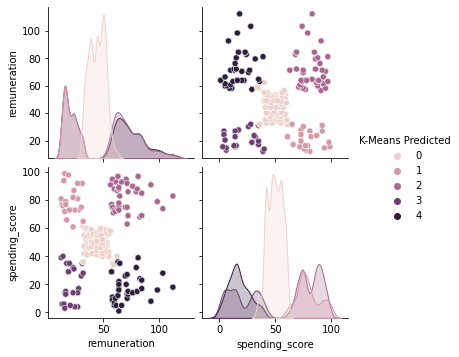

In [35]:
kmeans(5,R_SS)

### 4b) Using the value _k_ = 6

1    767
3    356
0    271
5    269
4    214
2    123
Name: K-Means Predicted, dtype: int64


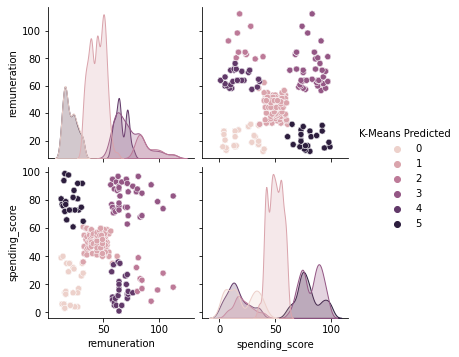

In [36]:
kmeans(6, R_SS)

### 4c) Using the value _k_ = 7

1    731
2    356
4    269
0    221
3    154
5    146
6    123
Name: K-Means Predicted, dtype: int64


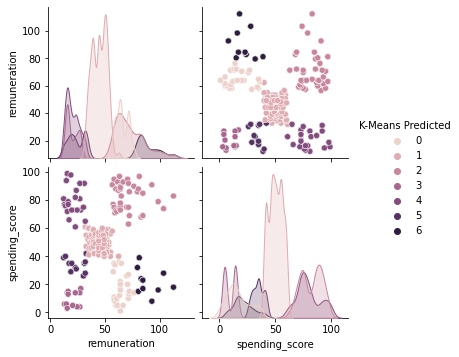

In [37]:
kmeans(7,R_SS)

With 7 clusters, the outliers are grouped in a separate cluster, meaning each point is closer to its centroid

## 5. Fit final model and justify your choice

0    774
4    356
2    330
1    271
3    269
Name: K-Means Predicted, dtype: int64


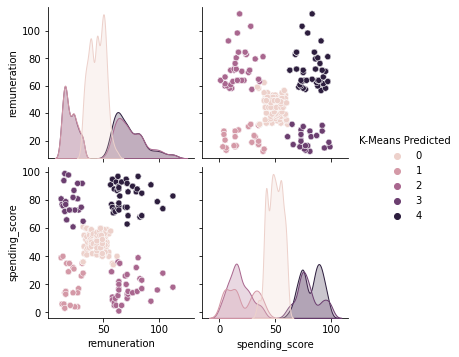

In [38]:
# Apply the final model.
kmeans(5, R_SS)

## 6. Plot and interpret the clusters

remuneration  spending_score K-Means Predicted
0            12.30              39             LS LR
1            12.30              81             HS LR
2            13.12               6             LS LR
3            13.12              77             HS LR
4            13.94              40             LS LR
...            ...             ...               ...
1995         84.46              69             LS HR
1996         92.66               8             HS HR
1997         92.66              91             LS HR
1998         98.40              16             HS HR
1999         92.66               8             HS HR

[2000 rows x 3 columns]

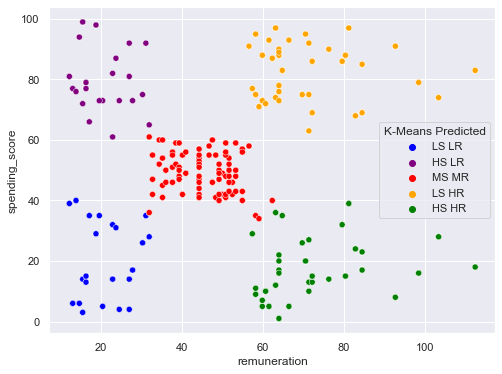

In [39]:
# Renaming clusters
clus_name = {0 : 'MS MR', 2 : 'HS HR', 4 : 'LS HR', 1 : 'LS LR', 3 : 'HS LR'}
R_SS = R_SS.replace({'K-Means Predicted': clus_name})


# Visualising the clusters.
sns.set(rc = {'figure.figsize':(8, 6)})
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=R_SS ,
                hue='K-Means Predicted',
                palette=['blue', 'purple', 'red', 'orange', 'green'])
                        

# View the DataFrame.
R_SS

## 7. Remuneration vs Loyalty Points (by clusters)

In [40]:
R_SS_LP = R_SS.copy().join(reviews_clean['loyalty_points'])
R_SS_LP

remuneration  spending_score K-Means Predicted  loyalty_points
0            12.30              39             LS LR             210
1            12.30              81             HS LR             524
2            13.12               6             LS LR              40
3            13.12              77             HS LR             562
4            13.94              40             LS LR             366
...            ...             ...               ...             ...
1995         84.46              69             LS HR            4031
1996         92.66               8             HS HR             539
1997         92.66              91             LS HR            5614
1998         98.40              16             HS HR            1048
1999         92.66               8             HS HR             479

[2000 rows x 4 columns]

MS MR    774
LS HR    356
HS HR    330
LS LR    271
HS LR    269
Name: K-Means Predicted, dtype: int64

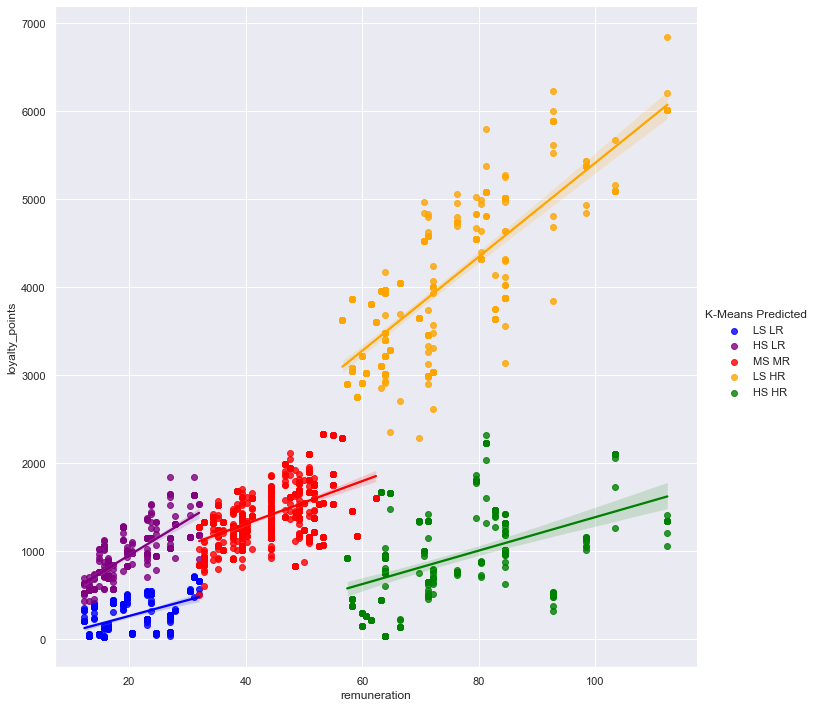

In [41]:
# scatter plot 
colours = ['blue', 'purple', 'red', 'orange', 'green']

sns.lmplot('remuneration', 'loyalty_points', data=R_SS_LP, \
           hue='K-Means Predicted', palette=colours, height=10)

R_SS_LP['K-Means Predicted'].value_counts()

The clusters identified by _k_-means clustering between 'remuneration' and 'spending_score' can also be used to clarify the trends between 'remuneration' and 'loyalty_points'

> There are no clear outliers within each cluster <br>
> While each cluster might have different correlation coefficients, there is a general positive trend for all groups

> Further studies can be done to verify the accuracy of predicted regression for each cluster <br> _if time permits_


### _Additional : 6 clusters (k=6)_

1    767
2    356
3    271
4    269
5    214
0    123
Name: K-Means Predicted, dtype: int64


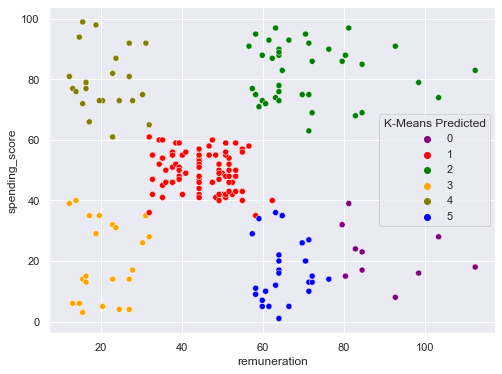

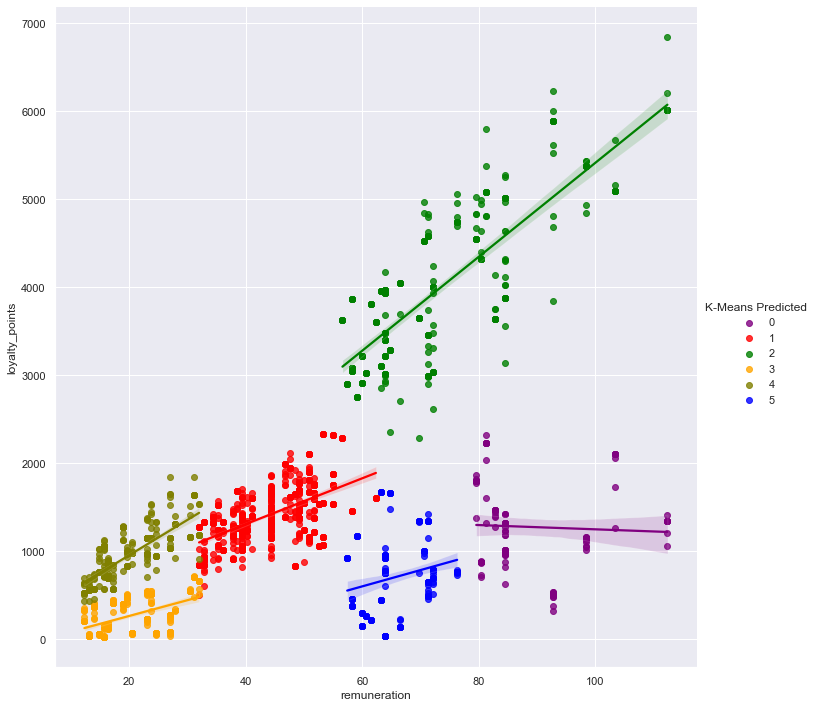

In [42]:
# k-means scattering given k = 6 & dataset
R_SS_6 = reviews_clean[['remuneration','spending_score']].copy()

# Use k clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(R_SS_6)

clusters = kmeans.labels_
R_SS_6['K-Means Predicted'] = clusters
    
# Check the number of observations per predicted class.
print(R_SS_6['K-Means Predicted'].value_counts())

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=R_SS_6 ,
                hue='K-Means Predicted',
                palette=['purple', 'red', 'green', 'orange', 'olive', 'blue'])

R_SS_6_LP = R_SS_6.copy().join(reviews_clean['loyalty_points'])
R_SS_6_LP

# scatter plot 
colours = ['purple', 'red', 'green', 'orange', 'olive', 'blue']

sns.lmplot('remuneration', 'loyalty_points', data=R_SS_6_LP, \
           hue='K-Means Predicted', palette=colours, height=10)

## 8. Discuss: Insights and observations

***Your observations here...***

### Further developments:

1) Investigating cluster category
- are the clusters divided by other known customer characteristics (such as age/gender/education)?
- making meaning out of the clusters will also help with re-evaluating whether 5 is the right number of clusters

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [43]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

#nltk.download ('punkt')
#nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import words
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load the data set as df3.
Rev_Sum = reviews_clean[['review','summary']].copy()

# View DataFrame.
Rev_Sum

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [45]:
# Explore data set.
Rev_Sum.info()

Rev_Sum_na = Rev_Sum[reviews.isna().any(axis=1)]
print('\n', Rev_Sum_na.shape[0],"Rows with Missing Data")
Rev_Sum_na

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB

 0 Rows with Missing Data


Empty DataFrame
Columns: [review, summary]
Index: []

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [46]:
# Review: Change all to lower case and join with a space.
Rev_Sum_clean = Rev_Sum.copy()

Rev_Sum_clean['review'] = Rev_Sum_clean['review'].apply(lambda x: " ".\
                                                        join(x.lower( ) for x in x.split( )))
Rev_Sum_clean['summary'] = Rev_Sum_clean['summary'].apply(lambda x: " ".\
                                                        join(x.lower( ) for x in x.split( )))

In [47]:
# Summary: Change all to lower case and join with a space.
Rev_Sum_clean

review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*: your unpainted ...   
2     nice art, nice printing. why two panels are fi...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game. did not think i would like it when...   
1997  great game for all......... keeps the mind nim...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995     the perfect word game for mixed ages (with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [48]:
# Replace all the punctuations in review column.
Rev_Sum_clean['review'] = Rev_Sum_clean['review'].str.replace('[^\w\s]','')


# View output.
Rev_Sum_clean

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995     the perfect word game for mixed ages (with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

In [49]:
# Replace all the puncuations in summary column.
Rev_Sum_clean['summary'] = Rev_Sum_clean['summary'].str.replace('[^\w\s]','')

# View output.
Rev_Sum_clean

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

### 2c) Drop duplicates in both columns

In [50]:
Rev_Sum_clean.shape

(2000, 2)

In [51]:
# Check the number of duplicate values in the REVIEW column.
print("No. of duplicates: ", Rev_Sum_clean.duplicated().sum())

# Drop duplicates in both columns.
Rev_Sum_unique = Rev_Sum_clean.copy().drop_duplicates()
Rev_Sum_unique.reset_index(inplace=True,drop=True)

# View DataFrame.
Rev_Sum_unique

No. of duplicates:  39


review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1956  the perfect word game for mixed ages with mom ...   
1957  great game did not think i would like it when ...   
1958           great game for all keeps the mind nimble   
1959                                           fun game   
1960  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 2 columns]

In [52]:
# View the top 15 most duplicated 'review' inputs
Rev_Sum_clean.value_counts().head(15)

review                      summary   
great game                  five stars    8
love it                     five stars    7
great                       five stars    6
good                        five stars    4
as expected                 five stars    3
awesome                     five stars    2
ok                          five stars    2
cute                        five stars    2
best game ever              five stars    2
ontime and nice item        five stars    2
very cute                   five stars    2
great addition to the game  five stars    2
love these                  five stars    2
fun game                    five stars    2
awesome game                five stars    2
dtype: int64

Although removing duplicates might possibly remove submissions from different customers that are coincidentally identical, the number of inputs removed (1.95%) is inconsequential.

The reviews/summary are also simplistic and are not significantly value-added

## 3. Tokenise and create wordclouds

In [53]:
# Create new DataFrame (copy DataFrame).
Rev_Sum_token = Rev_Sum_unique.copy()

# View DataFrame.
Rev_Sum_token

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1956  the perfect word game for mixed ages with mom ...   
1957  great game did not think i would like it when ...   
1958           great game for all keeps the mind nimble   
1959                                           fun game   
1960  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 2 columns]

In [54]:
# Apply tokenisation to both columns.
Rev_Sum_token['review_tokens'] = Rev_Sum_token['review'].apply(word_tokenize)
Rev_Sum_token['summary_tokens'] = Rev_Sum_token['summary'].apply(word_tokenize)

# View DataFrame.
Rev_Sum_token

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1956  the perfect word game for mixed ages with mom ...   
1957  great game did not think i would like it when ...   
1958           great game for all keeps the mind nimble   
1959                                           fun game   
1960  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1956      the perfect word game for mixed ages with mom   
1957                                          super fun   
1958                                         great game   
1959                                         four stars   
1960                                     love this game   

                                          review_tokens  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1956  [the, perfect, word, game, for, mixed, ages, w...   
1957  [great, game, did, not, think, i, would, like,...   
1958  [great, game, for, all, keeps, the, mind, nimble]   
1959                                        [fun, game]   
1960  [this, game, is, fun, a, lot, like, scrabble, ...   

                                         summary_tokens  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1956  [the, perfect, word, game, for, mixed, ages, w...  
1957                                       [super, fun]  
1958                                      [great, game]  
1959                                      [four, stars]  
1960                                 [love, this, game]  

[1961 rows x 4 columns]

In [55]:
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))
all_english_words = set(words.words())

In [56]:
# Create function to create word cloud
def combine_words(source,col) :
    # String all the tokens together in a single variable.
    # Create an empty string variable
    all_words = ''
    
    # for each row
    for i in range(source.shape[0]):
        
        #for each token
        for x in source[col][i]:
            # if token is not english stopword
            if x not in english_stopwords:
                # Add each comment.
                all_words = all_words + " " + x
    return all_words

def create_wordcloud(all_words) :
    
    # Set the colour palette.
    sns.set(color_codes=True)

    # Create a WordCloud object.
    word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_words) 
    
    # Plot the WordCloud image.                    
    plt.figure(figsize = (16, 9), facecolor = None) 
    plt.imshow(word_cloud) 
    plt.axis('off') 
    plt.tight_layout(pad = 0) 
    plt.show()

In [57]:
def combine_tokens(source,col) :
    # Combine all the tokens together in a single list.
    # Create an empty list of tokens
    all_tokens = []
    
    # for each row
    for i in range(source.shape[0]):
        # Add each token to the list.
        all_tokens = all_tokens + source[col][i]
    
    return all_tokens

WORDCLOUD FOR REVIEW
Number of words:  57668


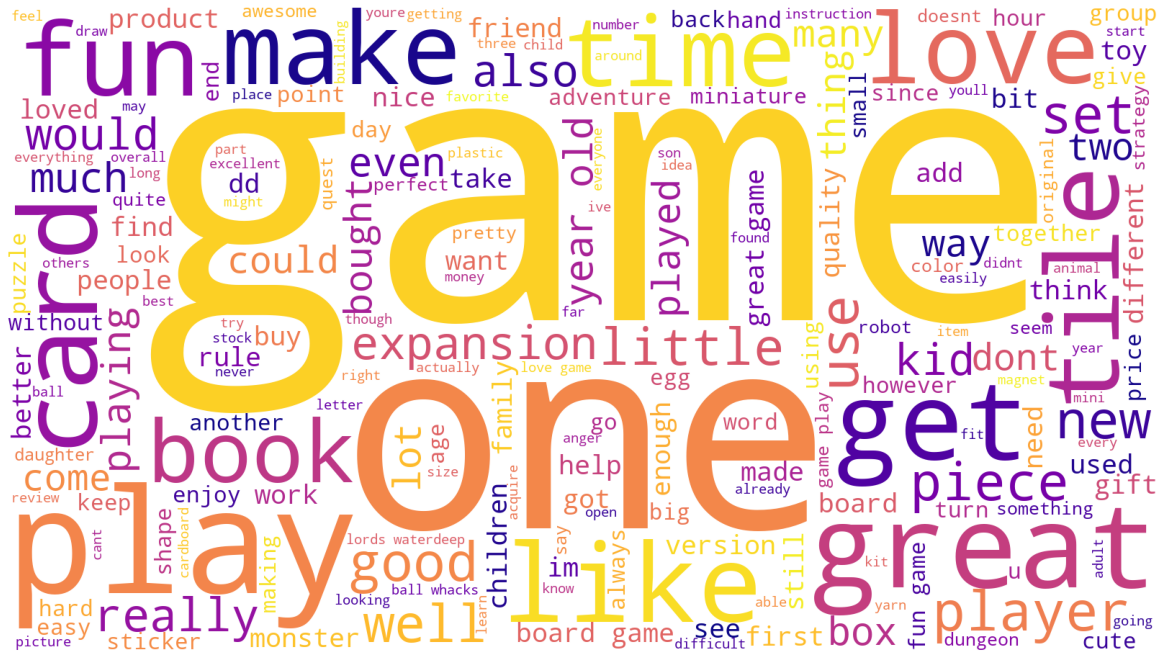

In [58]:
# Review: Create & Plot a word cloud.
print("WORDCLOUD FOR REVIEW")

review_combined = combine_words(Rev_Sum_token,'review_tokens')

print("Number of words: ", len(review_combined.split()))
create_wordcloud(review_combined)

WORDCLOUD FOR SUMMARY
Number of words:  6138


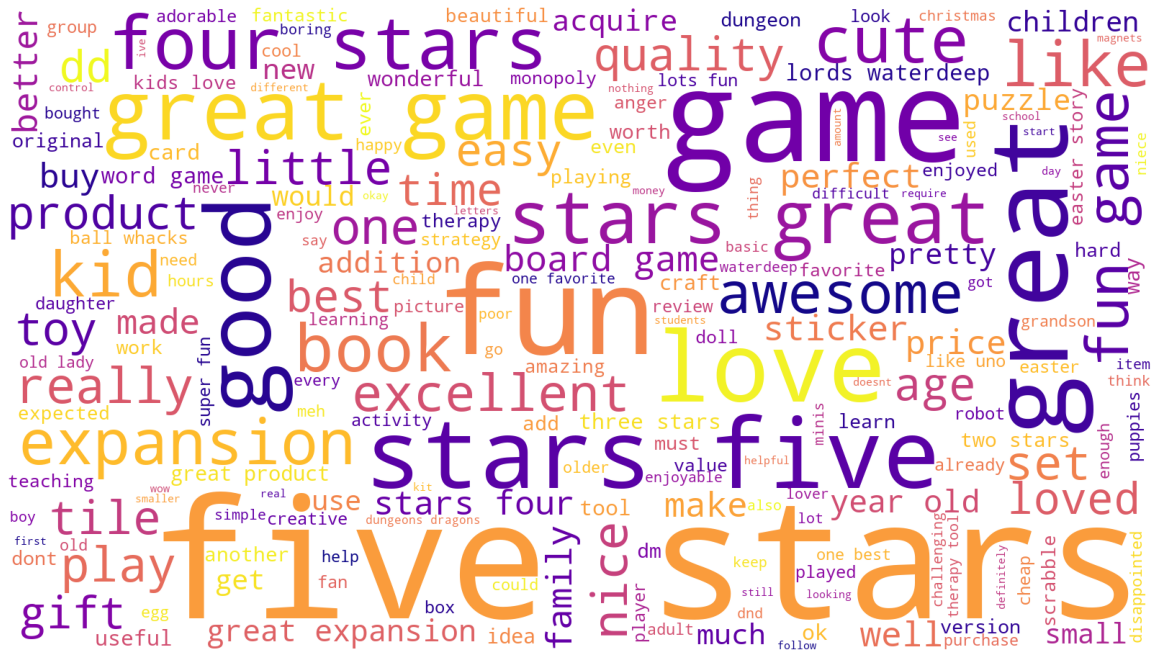

In [59]:
# Summary: Create & Plot a word cloud.
print("WORDCLOUD FOR SUMMARY")

summary_combined = combine_words(Rev_Sum_token,'summary_tokens')

print("Number of words: ", len(summary_combined.split()))
create_wordcloud(summary_combined)

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [60]:
# Determine the frequency distribution of review column
fdist_review = FreqDist(combine_tokens(Rev_Sum_token,'review_tokens'))
fdist_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [61]:
# Determine the frequency distribution of summary column
fdist_summary = FreqDist(combine_tokens(Rev_Sum_token,'summary_tokens'))
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords from df

In [62]:
len(Rev_Sum_token['review_tokens'][1])

127

In [63]:
# Delete all the non-alpanum and stopwords in review tokens
Rev_token_eng = [[y.lower() for y in x if y.lower() not in english_stopwords \
                      and y.isalpha() and y.lower() in all_english_words] \
                     for x in Rev_Sum_token['review_tokens']]

Rev_Sum_token_eng = Rev_Sum_token.copy()
Rev_Sum_token_eng['review_tokens'] = Rev_token_eng
len(Rev_Sum_token_eng['review_tokens'][1])

54

In [64]:
Rev_Sum_token['review_tokens'][1]

['an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 'terrible',
 'im',
 'still',
 'waiting',
 'for',
 'a',
 'single',
 'screen',
 'that',
 'isnt',
 'polluted',
 'with',
 'pointless',
 'artwork',
 'where',
 'useful',
 'referenceable',
 'tables',
 'should',
 'be',
 'once',
 'again',
 'youve',
 'created',
 'a',
 'single',
 'use',
 'screen',
 'that',
 'is',
 'only',
 'useful',
 'when',
 'running',
 'the',
 'storm',
 'kings',
 'thunder',
 'adventure',
 'even',
 'despite',
 'the',
 'fact',
 'that',
 'its',
 'geared',
 'to',
 'that',
 'adventure',
 'path',
 'its',
 'usefulness',
 'negligible',
 'at',
 'best',
 'i',
 'massive',
 'swath',
 'of',
 'the',
 'inner',
 'panel',
 'is',
 'wasted',
 'on',
 'artwork',
 'and',
 'a',
 'bloated',
 'overland',
 'map',
 'which',
 'could',
 

In [65]:
Rev_Sum_token_eng['review_tokens'][1]

['open',
 'letter',
 'unpainted',
 'bad',
 'spell',
 'great',
 'board',
 'however',
 'terrible',
 'still',
 'waiting',
 'single',
 'screen',
 'polluted',
 'pointless',
 'useful',
 'tables',
 'youve',
 'single',
 'use',
 'screen',
 'useful',
 'running',
 'storm',
 'thunder',
 'adventure',
 'even',
 'despite',
 'fact',
 'geared',
 'adventure',
 'path',
 'usefulness',
 'negligible',
 'best',
 'massive',
 'swath',
 'inner',
 'panel',
 'wasted',
 'bloated',
 'overland',
 'map',
 'could',
 'easily',
 'reduced',
 'single',
 'panel',
 'size',
 'table',
 'short',
 'stop',
 'making',
 'crap']

In [66]:
# Delete all the non-alpanum and stopwords in summary tokens
Sum_token_eng = [[y.lower() for y in x if y.lower() not in english_stopwords \
                      and y.isalpha() and y.lower() in all_english_words] \
                     for x in Rev_Sum_token['summary_tokens']]

Rev_Sum_token_eng['summary_tokens'] = Sum_token_eng

### 4c) Create wordcloud with only English words

WORDCLOUD FOR REVIEW
Number of words:  42914


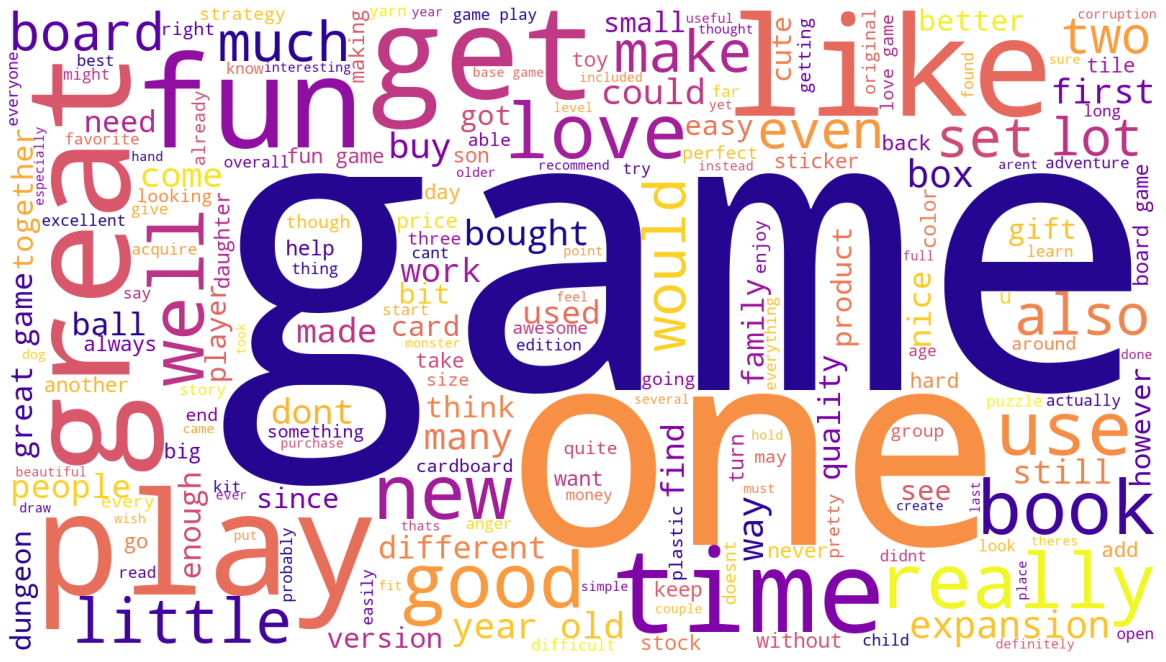

In [67]:
# Create a wordcloud with only English words.
# Review: Create & Plot a word cloud.
print("WORDCLOUD FOR REVIEW")

review_eng_combined = combine_words(Rev_Sum_token_eng,'review_tokens')

print("Number of words: ", len(review_eng_combined.split()))
create_wordcloud(review_eng_combined)

WORDCLOUD FOR SUMMARY
Number of words:  4658


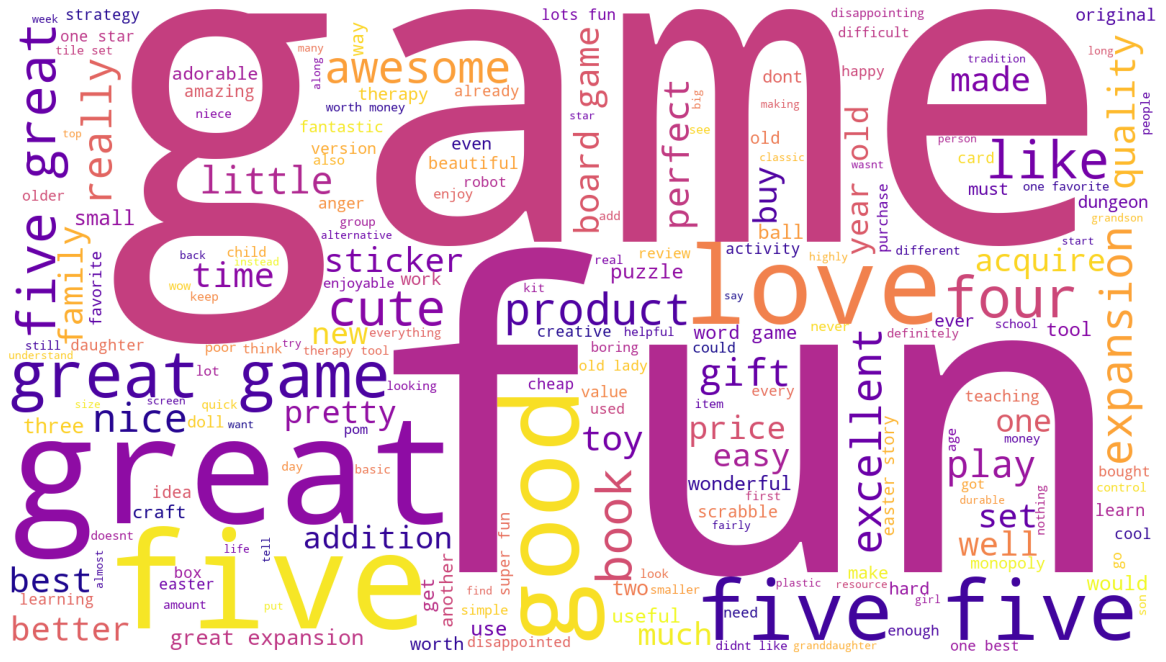

In [68]:
# Summary: Create & Plot a word cloud.
print("WORDCLOUD FOR SUMMARY")

summary_eng_combined = combine_words(Rev_Sum_token_eng,'summary_tokens')

print("Number of words: ", len(summary_eng_combined.split()))
create_wordcloud(summary_eng_combined)

### 4d) Identify 15 most common words and polarity

In [69]:
# Redo frequency distribution: reviews
rev_tokens_combined = combine_tokens(Rev_Sum_token_eng,'review_tokens')
fdist_review_eng = FreqDist(rev_tokens_combined)
fdist_review_eng

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'time': 291, ...})

In [70]:
# Redo frequency distribution: summary
sum_tokens_combined = combine_tokens(Rev_Sum_token_eng,'summary_tokens')
fdist_summary_eng = FreqDist(sum_tokens_combined)
fdist_summary_eng

FreqDist({'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, 'cute': 45, ...})

In [71]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [72]:
# Determine the 15 most common words : Reviews
# Generate a DataFrame from Counter.
counts_reviews = pd.DataFrame(Counter(rev_tokens_combined).most_common(15),
                      columns=['Word', 'Frequency'])

# Populate a new column with polarity scores for each review.
counts_reviews['polarity'] = counts_reviews['Word'].apply(generate_polarity)

# Preview data.
counts_reviews

Word  Frequency  polarity
0     game       1671 -0.400000
1    great        580  0.800000
2      fun        552  0.300000
3      one        530  0.000000
4     play        502  0.000000
5     like        414  0.000000
6     love        323  0.500000
7   really        319  0.200000
8      get        319  0.000000
9     time        291  0.000000
10    good        289  0.700000
11   would        280  0.000000
12    book        273  0.000000
13    well        269  0.000000
14     new        264  0.136364

In [73]:
# Determine the 15 most common words : Summary
# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(sum_tokens_combined).most_common(15),
                      columns=['Word', 'Frequency'])

# Populate a new column with polarity scores for each review.
counts_summary['polarity'] = counts_summary['Word'].apply(generate_polarity)

# Preview data.
counts_summary

Word  Frequency  polarity
0        five        342       0.0
1        game        319      -0.4
2       great        295       0.8
3         fun        218       0.3
4        love         93       0.5
5        good         92       0.7
6        four         58       0.0
7        like         54       0.0
8   expansion         52       0.0
9        cute         45       0.5
10       book         43       0.0
11        one         38       0.0
12    awesome         36       1.0
13    product         35       0.0
14        old         34       0.1

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and subjectivity scores for the respective columns.

In [74]:
Rev_Sum_Polarity = Rev_Sum_unique.copy()

In [75]:
# Populate a new column with polarity scores for each review.
Rev_Sum_Polarity['review_polarity'] = Rev_Sum_Polarity['review'].apply(generate_polarity)

# Populate a new column with subjectivity scores for each comment.
Rev_Sum_Polarity['review_subjectivity'] = Rev_Sum_Polarity['review'].apply(generate_subjectivity)

# Preview the result.
Rev_Sum_Polarity.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  review_polarity  \
0  the fact that 50 of this space is wasted on ar...        -0.036111   
1  another worthless dungeon masters screen from ...         0.035952   
2                     pretty but also pretty useless         0.116640   
3                                         five stars         0.578788   
4                                         money trap        -0.316667   

   review_subjectivity  
0             0.486111  
1             0.442976  
2             0.430435  
3             0.784848  
4             0.316667

In [76]:
# Populate a new column with polarity scores for each summary.
Rev_Sum_Polarity['summary_polarity'] = Rev_Sum_Polarity['summary'].apply(generate_polarity)

# Populate a new column with subjectivity scores for each comment.
Rev_Sum_Polarity['summary_subjectivity'] = Rev_Sum_Polarity['summary'].apply(generate_subjectivity)

# Preview the result.
Rev_Sum_Polarity.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  review_polarity  \
0  the fact that 50 of this space is wasted on ar...        -0.036111   
1  another worthless dungeon masters screen from ...         0.035952   
2                     pretty but also pretty useless         0.116640   
3                                         five stars         0.578788   
4                                         money trap        -0.316667   

   review_subjectivity  summary_polarity  summary_subjectivity  
0             0.486111              0.15              0.500000  
1             0.442976             -0.80              0.900000  
2             0.430435              0.00              0.733333  
3             0.784848              0.00              0.000000  
4             0.316667              0.00              0.000000

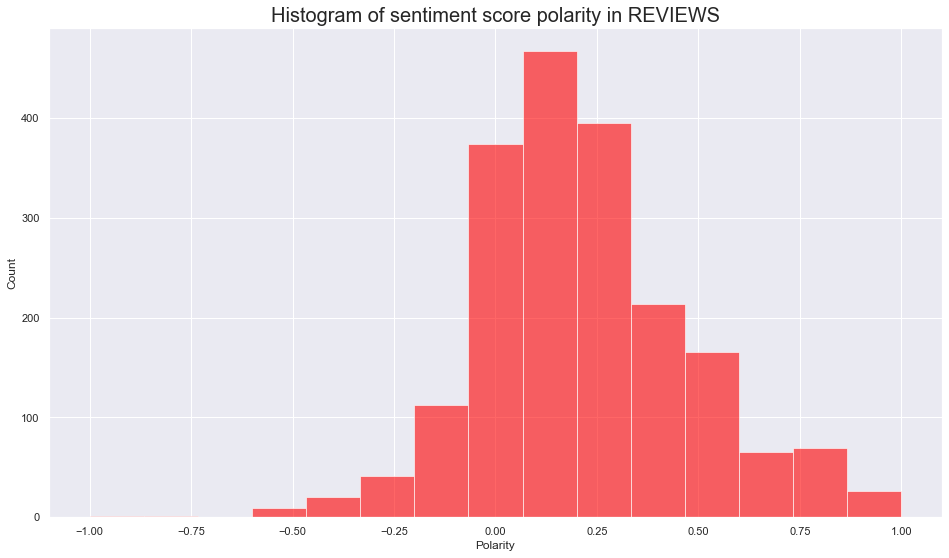

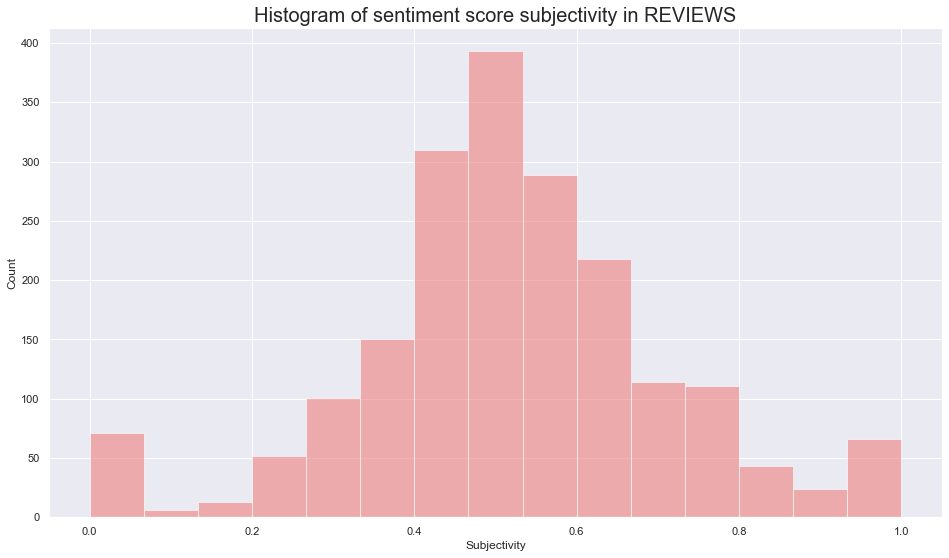

In [77]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(Rev_Sum_Polarity['review_polarity'], num_bins,\
                            facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity in REVIEWS', fontsize=20)

plt.show()

# Histogram of subjectivity score
# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(Rev_Sum_Polarity['review_subjectivity'], num_bins,\
                            facecolor='lightcoral', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity in REVIEWS', fontsize=20)

plt.show()

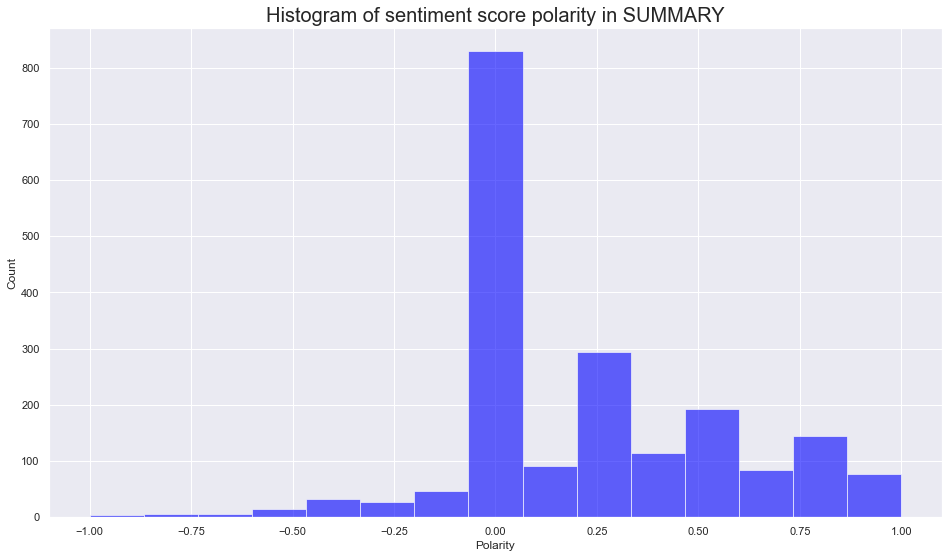

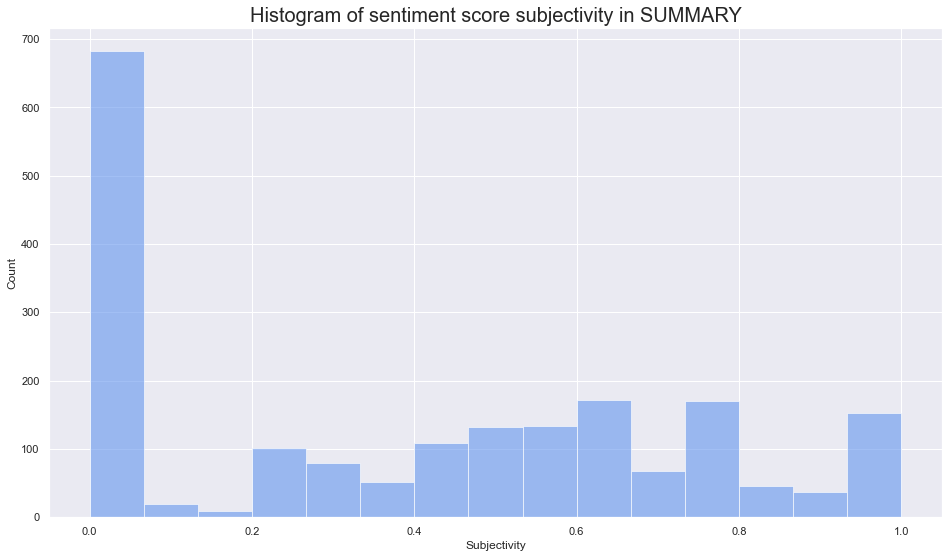

In [78]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(Rev_Sum_Polarity['summary_polarity'], num_bins, \
                            facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity in SUMMARY', fontsize=20)

plt.show()

# Histogram of subjectivity score
# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(Rev_Sum_Polarity['summary_subjectivity'], num_bins, \
                            facecolor='cornflowerblue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity in SUMMARY', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [93]:
# Top 20 negative reviews.
Rev_neg = Rev_Sum_Polarity.nsmallest(20,'review_polarity')\
                          .drop(['summary_polarity','summary_subjectivity'],axis=1)

# View output.
Rev_neg

review  \
207   booo unles you are patient know how to measure...   
181                   incomplete kit very disappointing   
1773  im sorry i just find this product to be boring...   
362   one of my staff will be using this game soon s...   
116   i bought this as a christmas gift for my grand...   
226   this was a gift for my daughter i found it dif...   
229                    i found the directions difficult   
289              instructions are complicated to follow   
300                                           difficult   
1501                         expensive for what you get   
173   i sent this product to my granddaughter the po...   
345   my 8 yearold granddaughter and i were very fru...   
531   i purchased this on the recommendation of two ...   
305                 very hard complicated to make these   
421                     kids i work with like this game   
430   this game although it appears to be like uno a...   
490   my son loves playing this game it was recommen...   
795                                this game is a blast   
798         i bought this for my son he loves this game   
814             was a gift for my son he loves the game   

                                                summary  review_polarity  \
207    boring unless you are a craft person which i am         -1.000000   
181                                      incomplete kit        -0.780000   
1773                                      disappointing        -0.583333   
362                                  anger control game        -0.550000   
116                                            stickers        -0.500000   
226                                           two stars        -0.500000   
229                                         three stars        -0.500000   
289                                           two stars        -0.500000   
300                                         three stars        -0.500000   
1501                                          two stars        -0.500000   
173                                      faulty product        -0.491667   
345                                          frustating        -0.446250   
531                                                hmmm        -0.440741   
305                                            one star        -0.439583   
421                                          four stars        -0.400000   
430   this game although it appears to be like uno a...        -0.400000   
490   it was recommended by a counselor at school th...        -0.400000   
795                                          five stars        -0.400000   
798                                          five stars        -0.400000   
814                                          five stars        -0.400000   

      review_subjectivity  
207              1.000000  
181              0.910000  
1773             0.750000  
362              0.300000  
116              0.900000  
226              1.000000  
229              1.000000  
289              1.000000  
300              1.000000  
1501             0.700000  
173              0.433333  
345              0.533750  
531              0.485185  
305              0.852083  
421              0.400000  
430              0.400000  
490              0.400000  
795              0.400000  
798              0.400000  
814              0.400000

In [94]:
# Top 20 negative summaries.
Sum_neg = Rev_Sum_Polarity.nsmallest(20,'summary_polarity')\
                          .drop(['review_polarity','review_subjectivity'],axis=1)

# View output.
Sum_neg

review  \
21    these are cute tatoos for those who love pirat...   
207   booo unles you are patient know how to measure...   
819   ive discovered that im really new school when ...   
1148  before this i hated running any rpg campaign d...   
1     an open letter to galeforce9 your unpainted mi...   
143   my kids grew up with a peg bench and hammer an...   
623                        eggs split and were unusable   
785   my mom already owned an acquire game but she a...   
1591  i was thinking it was a puppet but it is not i...   
361   i found that this card game does the opposite ...   
875   i guess i did not look closely to the informat...   
880   the game tiles board and tile stands are all m...   
177   at age 31 i found these very difficult to make...   
100   the book is only 4 pages and its about the siz...   
511        great game kids love to play again and again   
797   really cheaply produced cardboard playing piec...   
1001  i wish id watched some of the gameplay videos ...   
1099  i had high hopes for this game as i am a big f...   
1773  im sorry i just find this product to be boring...   
991   if you play dungeons and dragons then you will...   

                                                summary  summary_polarity  \
21                        the worst value ive ever seen         -1.000000   
207    boring unless you are a craft person which i am          -1.000000   
819                                              boring         -1.000000   
1148  before this i hated running any rpg campaign d...         -0.900000   
1     another worthless dungeon masters screen from ...         -0.800000   
143                                        disappointed         -0.750000   
623                                        disappointed         -0.750000   
785                                        disappointed         -0.750000   
1591                                       disappointed         -0.750000   
361   promotes anger instead of teaching calming met...         -0.700000   
875            too bad this is not what i was expecting         -0.700000   
880                        bad qualityall made of paper         -0.700000   
177     at age 31 i found these very difficult to make          -0.650000   
100                                    small and boring         -0.625000   
511                                          mad dragon         -0.625000   
797                                       disappointing         -0.600000   
1001                                      disappointing         -0.600000   
1099                                      disappointing         -0.600000   
1773                                      disappointing         -0.600000   
991   then you will find this board game to be dumb ...         -0.591667   

      summary_subjectivity  
21                1.000000  
207               1.000000  
819               1.000000  
1148              0.700000  
1                 0.900000  
143               0.750000  
623               0.750000  
785               0.750000  
1591              0.750000  
361               0.200000  
875               0.666667  
880               0.666667  
177               1.000000  
100               0.700000  
511               1.000000  
797               0.700000  
1001              0.700000  
1099              0.700000  
1773              0.700000  
991               0.633333

In [91]:
# Top 20 positive reviews.
Rev_pos = Rev_Sum_Polarity.nlargest(20,'review_polarity')\
                          .drop(['summary_polarity','summary_subjectivity'],axis=1)

# View output.
Rev_pos

review  \
7                             came in perfect condition   
164                                        awesome book   
193                                        awesome gift   
489   excellent activity for teaching selfmanagement...   
517                         perfect just what i ordered   
583                                   wonderful product   
601                                  delightful product   
613   wonderful for my grandson to learn the resurre...   
782                                             perfect   
923                                             awesome   
1119                                        awesome set   
1150               best set buy 2 if you have the means   
1159               awesome addition to my rpg gm system   
1282                                        its awesome   
1380  one of the best board games i played in along ...   
1523  my daughter loves her stickers awesome seller ...   
1580  this was perfect to go with the 7 bean bags  i...   
1684                                        awesome toy   
1689  it is the best thing to play with and also min...   
1695                  excellent toy to simulate thought   

                       summary  review_polarity  review_subjectivity  
7                   five stars              1.0                  1.0  
164                 five stars              1.0                  1.0  
193                 five stars              1.0                  1.0  
489                 five stars              1.0                  1.0  
517                 five stars              1.0                  1.0  
583                 five stars              1.0                  1.0  
601                 five stars              1.0                  1.0  
613                 five stars              1.0                  1.0  
782                aquire game              1.0                  1.0  
923                 five stars              1.0                  1.0  
1119                five stars              1.0                  1.0  
1150                five stars              1.0                  0.3  
1159                five stars              1.0                  1.0  
1282                five stars              1.0                  1.0  
1380                five stars              1.0                  0.3  
1523  awesome seller thank you              1.0                  1.0  
1580                five stars              1.0                  1.0  
1684                five stars              1.0                  1.0  
1689               three stars              1.0                  0.3  
1695                five stars              1.0                  1.0

In [92]:
# Top 20 positive summaries.
Sum_pos = Rev_Sum_Polarity.nlargest(20,'summary_polarity')\
                          .drop(['review_polarity','review_subjectivity'],axis=1)

# View output.
Sum_pos

review  \
6    i have bought many gm screens over the years b...   
28   these are intricate designs for older children...   
32   awesome my 8 year olds favorite xmas gift its ...   
80   my daughter loves these little books theyre th...   
133  this occupied my almost3 year old for nearly a...   
139  i bought 8 of these for my 3 year old daughter...   
160  my 8 year old son loves this drawing book love...   
162  this was a christmas present for a nephew who ...   
186  great product took a little practice and time ...   
209  i was skeptical but my 9 year old has had so m...   
412  great resource for bhis care coordinators work...   
468  this is a great anger management game for kidd...   
536  this is a great game to play with kids of diff...   
541  i am a therapist for children and this game is...   
572  if you have the pigeon books in your elementar...   
591  wow this product is incredible i was hesitant ...   
639  beautiful we look forward to the easter story ...   
643  we have several different sets of these magnet...   
649  my son is 2 years and 4 months he is a little ...   
654  great puzzles for toddlers to put together by ...   

                                               summary  summary_polarity  \
6                                  best gm screen ever               1.0   
28                                   wonderful designs               1.0   
32                                             perfect               1.0   
80   theyre the perfect size to keep in the car or ...               1.0   
133                            perfect for preschooler               1.0   
139             awesome sticker activity for the price               1.0   
160                                       awesome book               1.0   
162                    he was very happy with his gift               1.0   
186                                            awesome               1.0   
209           awesome and welldesigned for 9 year olds               1.0   
412                                            perfect               1.0   
468                                          excellent               1.0   
536                                          excellent               1.0   
541                             excellent therapy tool               1.0   
572  the pigeon is the perfect addition to a school...               1.0   
591                          best easter teaching tool               1.0   
639                                          wonderful               1.0   
643              all f the mudpuppy toys are wonderful               1.0   
649                                     awesome puzzle               1.0   
654                               not the best quality               1.0   

     summary_subjectivity  
6                     0.3  
28                    1.0  
32                    1.0  
80                    1.0  
133                   1.0  
139                   1.0  
160                   1.0  
162                   1.0  
186                   1.0  
209                   1.0  
412                   1.0  
468                   1.0  
536                   1.0  
541                   1.0  
572                   1.0  
591                   0.3  
639                   1.0  
643                   1.0  
649                   1.0  
654                   0.3

## 7. Discuss: Insights and observations

***Your observations here...***

# 